# 🛠️ 1. Preparação dos dados

### 1.1 Extração do Arquivo Tratado

In [24]:
import pandas as pd

In [25]:
df = pd.read_csv('data\\telecomx_data_gold.csv')

In [26]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Daily_Charges
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.156476
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.969099
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.429323
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.221565
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.758054


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   int64  
 5   customer.Dependents        7043 non-null   int64  
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   int64  
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

### 1.2 Remoção de Colunas Irrelevantes

In [28]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Daily_Charges'],
      dtype='object')

In [29]:
df = df.drop('customerID', axis=1)
df.columns


Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Daily_Charges'],
      dtype='object')

### 1.3 Encoding

In [30]:
# Criação de uma cópia do DataFrame, por garantia.
df_encoding = df.copy()

In [31]:
# Identificar colunas categóricas
colunas_categoricas = df_encoding.select_dtypes(include=['object', 'category']).columns
print("Colunas categóricas:", colunas_categoricas.tolist())

Colunas categóricas: ['customer.gender', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaymentMethod']


In [32]:
# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df_encoding, columns=colunas_categoricas, drop_first=True, dtype=int)

# Visualizar as novas colunas
df_encoded.head()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Daily_Charges,...,internet.TechSupport_Yes,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,0,1,1,9,1,1,65.6,593.30,2.156476,...,1,0,1,0,0,1,0,0,0,1
1,0,0,0,0,9,1,0,59.9,542.40,1.969099,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,4,1,1,73.9,280.85,2.429323,...,0,0,0,0,0,0,0,0,1,0
3,1,1,1,0,13,1,1,98.0,1237.85,3.221565,...,0,0,1,0,1,0,0,0,1,0
4,1,1,1,0,3,1,1,83.9,267.40,2.758054,...,1,0,1,0,0,0,0,0,0,1


In [33]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Churn                                          7043 non-null   int64  
 1   customer.SeniorCitizen                         7043 non-null   int64  
 2   customer.Partner                               7043 non-null   int64  
 3   customer.Dependents                            7043 non-null   int64  
 4   customer.tenure                                7043 non-null   int64  
 5   phone.PhoneService                             7043 non-null   int64  
 6   account.PaperlessBilling                       7043 non-null   int64  
 7   account.Charges.Monthly                        7043 non-null   float64
 8   account.Charges.Total                          7043 non-null   float64
 9   Daily_Charges                                  7043 

### 1.4 Verificação da Proporção de Evasão

In [34]:
# Verificando a contagem de cada classe na coluna 'Churn'

count_churn = df_encoded['Churn'].value_counts()
print(count_churn)
print("Para 0 = Não Churn (Permaneceu), Para 1 = Churn (Evadiu)")

Churn
0    5174
1    1869
Name: count, dtype: int64
Para 0 = Não Churn (Permaneceu), Para 1 = Churn (Evadiu)


In [35]:
# Calculando a proporção em porcentagem

prop_churn = df_encoded['Churn'].value_counts(normalize=True) * 100
print(prop_churn.round(2))

Churn
0    73.46
1    26.54
Name: proportion, dtype: float64


In [36]:
# Avaliação de desequilíbrio
threshold = 0.10  # margem de 10% entre as classes para considerar equilibrado

majority_class_prop = prop_churn.max()
minority_class_prop = prop_churn.min()

print("\nAvaliação de desequilíbrio:")
if (majority_class_prop - minority_class_prop) > (threshold * 100):
    print("As classes estão desequilibradas.")
    print("Isso pode impactar negativamente o desempenho dos modelos preditivos.")
    print("Considere aplicar técnicas como SMOTE, undersampling ou class_weight.")
else:
    print("As classes estão razoavelmente equilibradas.")



Avaliação de desequilíbrio:
As classes estão desequilibradas.
Isso pode impactar negativamente o desempenho dos modelos preditivos.
Considere aplicar técnicas como SMOTE, undersampling ou class_weight.


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_5988\1972528806.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df_encoded, palette='Set2')


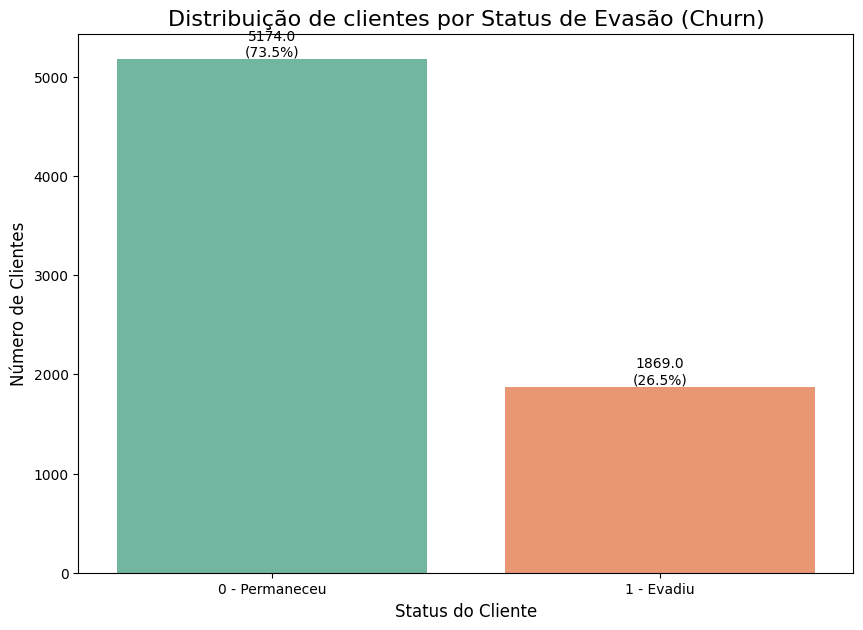

In [39]:
# Visualização da proporção com um gráfico de barras
plt.figure(figsize=(10, 7))
ax = sns.countplot(x='Churn', data=df_encoded, palette='Set2')
plt.title('Distribuição de clientes por Status de Evasão (Churn)', fontsize=16)
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['0 - Permaneceu', '1 - Evadiu'])

# Adicionando os rótulos de contagem e porcentagem
total = len(df_encoded['Churn'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height +3,
            f'{height}\n({(height/total)*100:.1f}%)',
            ha="center", va='bottom')

plt.show()

A análise da variável alvo `Churn` revela um desequilíbrio entre as classes. Aproximadamente 73% dos clientes permaneceram ativos, enquanto 27% evadiram. Esse desequilíbrio pode impactar negativamente os modelos preditivos, favorecendo a classe majoritária e resultando em baixa capacidade de detectar corretamente os casos de churn. Por isso, técnicas de balanceamento, como oversampling (SMOTE) ou uso de métricas específicas (F1-score, recall), devem ser consideradas nas próximas etapas.


### 1.5 Balanceamento de Classes

In [40]:
# Usado o df_encoded que foi gerado na etapa de encoding

df_scaled = df_encoded.copy()

In [41]:
X = df_scaled.drop('Churn', axis=1)
y = df_scaled['Churn']

In [42]:
from sklearn.preprocessing import StandardScaler

# Aplicando o StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
# Aplicando SMOTE
oversampling = SMOTE(random_state=42)
X_resampled, y_resampled = oversampling.fit_resample(X_scaled, y)


In [45]:
# Reconstruindo o DataFrame balanceado
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
df_balanceado = X_resampled_df.copy()
df_balanceado['Churn'] = y_resampled.values

In [46]:
print(df_balanceado['Churn'].value_counts())

Churn
0    5174
1    5174
Name: count, dtype: int64


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_5988\2000731372.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_balanceado, palette='Set2')


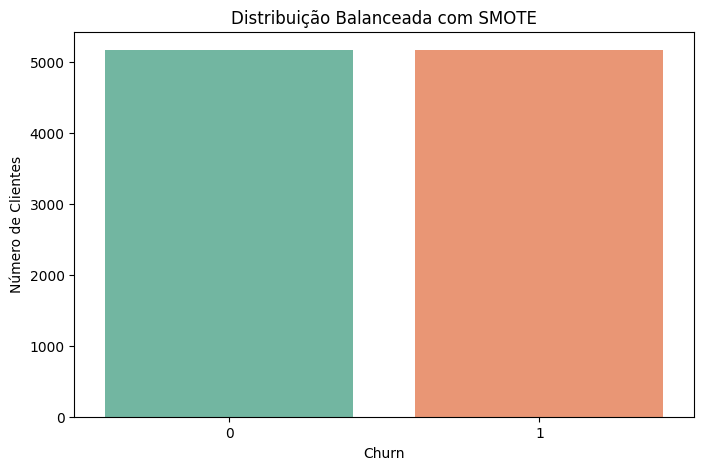

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df_balanceado, palette='Set2')
plt.title('Distribuição Balanceada com SMOTE')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()


# 🎯 Correlação e Seleção de Variáveis

### 2.1 Separação dos Dados